<a href="https://colab.research.google.com/github/neha702/Sparks-Foundation-tasks/blob/master/Sparks_Foundation_task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 4: To Explore Decision Tree Algorithm**

In this task, we are expected to create decision tree and visually it graphically. We also have to predict the class to which the newly added data belong with the help of this classifier. 

**Importing Libraries**

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Importing and preparing data**

In [2]:
#importing dataset
datas=pd.read_csv('Iris.csv')
datas.head()
datas.drop(['Id'],axis=1,inplace=True)
X=datas.iloc[:,:-1].values
Y=datas.iloc[:,-1].values
datas.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Splitting the dataset into training set and test set**

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=0)

**Feature extraction**

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

**Categorical data**

In [5]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
Y=label.fit_transform(Y)

**Fitting decision tree classifier to the training set**

In [6]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

**Predicting the test results**

In [7]:
y_pred=classifier.predict(X_test)

**Making confusion matrix**

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


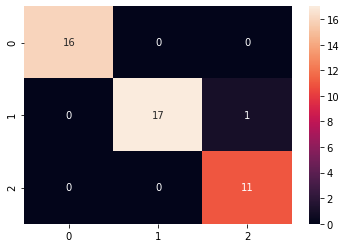

In [8]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)

**Plot tree**

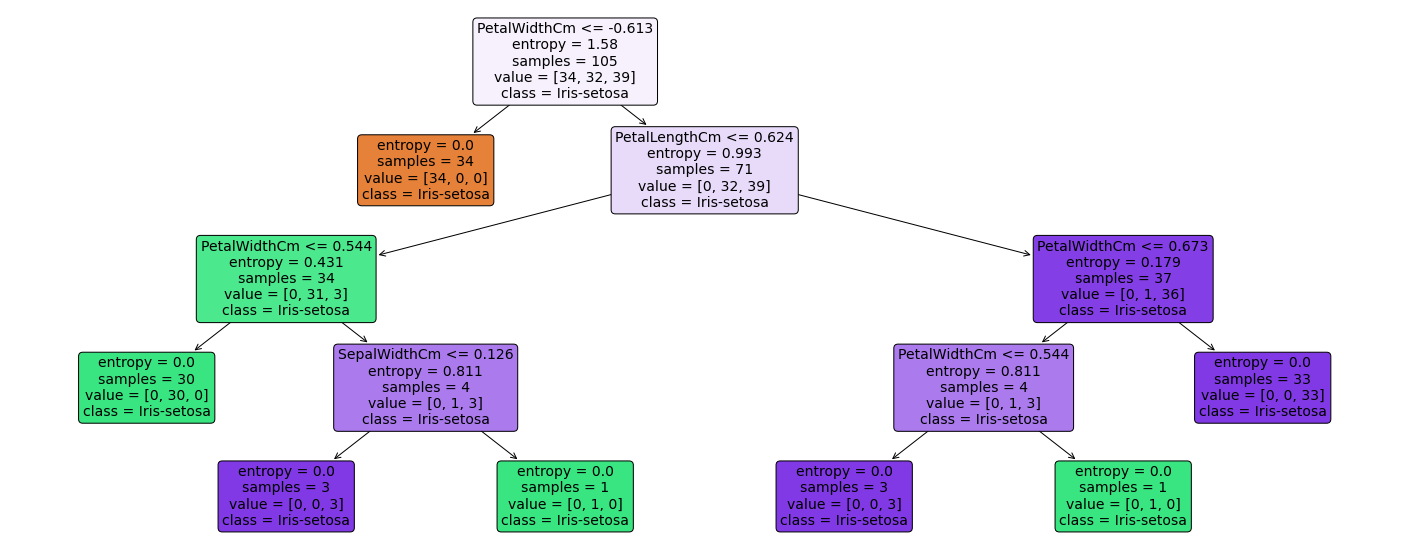

In [9]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
a=plot_tree(classifier,feature_names=['SepallengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm',],
            class_names=datas['Species'],filled=True,rounded=True,fontsize=14)

**Accuracy**

In [10]:
from sklearn import metrics
metrics.accuracy_score(y_pred,Y_test)


0.9777777777777777